<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#formatting" data-toc-modified-id="formatting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>formatting</a></span></li></ul></li><li><span><a href="#asr" data-toc-modified-id="asr-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>asr</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#comparing-models" data-toc-modified-id="comparing-models-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>comparing models</a></span></li><li><span><a href="#BM-model" data-toc-modified-id="BM-model-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>BM model</a></span></li><li><span><a href="#estimate-versus-truth" data-toc-modified-id="estimate-versus-truth-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>estimate versus truth</a></span><ul class="toc-item"><li><span><a href="#CIs" data-toc-modified-id="CIs-5.0.3.1"><span class="toc-item-num">5.0.3.1&nbsp;&nbsp;</span>CIs</a></span></li></ul></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Root-node-CI" data-toc-modified-id="Root-node-CI-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Root node CI</a></span></li></ul></li><li><span><a href="#Mammal-LCA-node" data-toc-modified-id="Mammal-LCA-node-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mammal LCA node</a></span></li><li><span><a href="#Abundances-on-tree" data-toc-modified-id="Abundances-on-tree-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Abundances on tree</a></span></li></ul></li><li><span><a href="#Phylogenetic-signal" data-toc-modified-id="Phylogenetic-signal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Phylogenetic signal</a></span><ul class="toc-item"><li><span><a href="#Per-trait" data-toc-modified-id="Per-trait-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Per trait</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* use r-phylopars for ancestral state reconstruction of major archaeal clades

# Var

In [1]:
# workdir
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/ancestral_state/methanogen/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_rare250.RDS'

# host tree
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch.nwk'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(ape)
library(phytools)
library(Rphylopars)
library(phyloseq)

library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: maps

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/ancestral_state/methanogen/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1345 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1345 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1345 tips and 1342 internal nodes ]

In [5]:
# metadata
meta = physeq %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name,
                  diet, digestive_system) %>%
    mutate_at(vars(starts_with('diet_')), function(x) ifelse(x == 'yes', 1, 0))
meta

SampleID,class,order,family,genus,scientific_name,diet,digestive_system
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,simple
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Mammalia,Perissodactyla,Equidae,Equus,Equus_quagga,herbivore,hindgut
X67_European_Roe,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut


In [6]:
# host tree
host_tree_SpecD = read.tree(host_tree_SpecD_file)
host_tree_SpecD


Phylogenetic tree with 110 tips and 109 internal nodes.

Tip labels:
	Leuciscus_cephalus, Rutilus_rutilus, Leuciscus_idus, Blicca_bjoerkna, Abramis_brama, Cyprinus_carpio, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

## formatting

In [7]:
# aggregating
physeq = tax_glom(physeq, taxrank='Class')
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 11 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 11 tips and 10 internal nodes ]

In [8]:
# filter by sparsity
physeq = physeq %>%
    filter_taxa(function(x) sum(x > 0) >= 2, TRUE) %>%
    prune_samples(sample_sums(.) > 0, .)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 9 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9 tips and 8 internal nodes ]

In [9]:
# trait table
otu = physeq %>%
    phyloseq2df(otu_table, long=TRUE) %>%
    inner_join(physeq %>% phyloseq2df(tax_table),
               c('OTU')) %>%
    inner_join(meta, c('Sample'='SampleID')) %>%
    filter(scientific_name %in% host_tree_SpecD$tip.label) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep='-')) %>%
    group_by(Sample, scientific_name, Taxonomy) %>%
    summarize(Abundance = sum(Count, na.rm=TRUE), .groups='drop') %>%
    spread(Taxonomy, Abundance) %>%
    rename('species' = scientific_name) %>%
    as.data.frame

rownames(otu) = otu$Sample
otu$Sample = NULL
otu

,species,Crenarchaeota-Bathyarchaeia,Euryarchaeota-Halobacteria,Euryarchaeota-Methanobacteria,Euryarchaeota-Methanomicrobia,Euryarchaeota-Thermococci,Euryarchaeota-Thermoplasmata,Euryarchaeota-unclassified,Nanoarchaeaeota-Woesearchaeia,Thaumarchaeota-Nitrososphaeria
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,Abramis_brama,1.2,0,74.4,24.4,0,0,0,0,0.0
F157a_European_Toad,Bufo_bufo,0.0,0,81.2,0.0,0,0,0,0,18.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper,Vipera_ursinii,0,0,0,2.4,0,0.8,0,0,96.8
X96_European_Hare,Lepus_europaeus,0,0,100,0.0,0,0.0,0,0,0.0


In [12]:
# checking table
otu[,2:ncol(otu)] %>% rowSums %>% summary
otu[,2:ncol(otu)] %>% colSums %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  99.20  100.00  100.00   99.99  100.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.2    19.6   615.6  2055.4  1574.8 13191.6 

In [13]:
# filtering taxa
x = otu[,2:ncol(otu)] %>% colSums
otu = otu[,c('species', names(x[x >= 50]))]
otu

,species,Crenarchaeota-Bathyarchaeia,Euryarchaeota-Halobacteria,Euryarchaeota-Methanobacteria,Euryarchaeota-Methanomicrobia,Euryarchaeota-Thermoplasmata,Thaumarchaeota-Nitrososphaeria
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,Abramis_brama,1.2,0,74.4,24.4,0,0.0
F157a_European_Toad,Bufo_bufo,0.0,0,81.2,0.0,0,18.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper,Vipera_ursinii,0,0,0,2.4,0.8,96.8
X96_European_Hare,Lepus_europaeus,0,0,100,0.0,0.0,0.0


In [15]:
# checking overlap
overlap(host_tree_SpecD$tip.label, otu$species)

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 110 


# asr

### comparing models

In [130]:
model_aic_bic = function(model, trait_data, tree){
    p_X = phylopars(trait_data = trait_data,
                    tree = tree,
                    model = model,
                    phylo_correlated = FALSE,
                    pheno_correlated = FALSE)
    return(c(model, AIC(p_X), BIC(p_X)))
}

model_fit = c('BM', 'OU', 'EB', 'star') %>%
    lapply(model_aic_bic, trait_data=otu, tree=host_tree_SpecD) %>%
    do.call(rbind, .) %>% as.data.frame %>%
    mutate(V2 = V2 %>% as.Num,
           V3 = V3 %>% as.Num)
colnames(model_fit) = c('model', 'AIC', 'BIC')
model_fit %>%
    arrange(AIC, BIC)

model,AIC,BIC
<chr>,<dbl>,<dbl>
BM,8915.569,8975.714
EB,8917.472,8982.629
OU,8917.578,8982.735
star,8971.799,9031.944


### BM model

In [131]:
# running
p_BM = phylopars(trait_data = otu,
                 tree = host_tree_SpecD,
                 model = 'BM',
                 phylo_correlated = FALSE,
                 pheno_correlated = FALSE)
p_BM %>% names

[1] "logLik"     "pars"       "model"      "mu"         "npars"     
 [6] "anc_recon"  "anc_var"    "anc_cov"    "tree"       "trait_data"
[11] "REML"

In [132]:
# confidence intervals
p_BM_CIL = p_BM$anc_recon - sqrt(p_BM$anc_var)*1.96 # Lower 95% CI
p_BM_CIU = p_BM$anc_recon + sqrt(p_BM$anc_var)*1.96 # Upper 95% CI

In [187]:
# confidence interval summary
((p_BM_CIU %>% as.matrix) - (p_BM_CIL %>% as.matrix)) %>% as.vector %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1.705323,16.04627,24.69667,25.2926,32.51343,85.09515,28.575,11.666


In [188]:
# confidence intervals (tips)
((p_BM_CIU[1:110,] %>% as.matrix) - (p_BM_CIL[1:110,] %>% as.matrix)) %>% as.vector %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1.705323,18.90655,27.15284,27.36717,34.95885,85.09515,28.144,11.49


In [135]:
# ancestral state reconstruction values
asr = p_BM$anc_recon %>% apply(2, scales::rescale) %>%
    as.data.frame
asr

,Crenarchaeota-Bathyarchaeia,Euryarchaeota-Halobacteria,Euryarchaeota-Methanobacteria,Euryarchaeota-Methanomicrobia,Euryarchaeota-Thermoplasmata,Thaumarchaeota-Nitrososphaeria
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Leuciscus_cephalus,0.005055315,0.00150481,0.6043500,0.3975412,0.01548778,0.1507656
Rutilus_rutilus,0.005055315,0.00150481,0.5114841,0.4417085,0.02066532,0.4099214
⋮,⋮,⋮,⋮,⋮,⋮,⋮
218,0.002016951,0.009377552,0.6806534,0.4623688,0.1050112,0.02496378
219,0.001529207,0.007697687,0.6441173,0.5326836,0.1014865,0.01413872


### estimate versus truth

In [155]:
# predicted abundances
asr_tips = asr[1:110,] %>%
    mutate(species = rownames(.)) %>%
    gather(taxon, predict, -species)
asr_tips

species,taxon,predict
<chr>,<chr>,<dbl>
Leuciscus_cephalus,Crenarchaeota-Bathyarchaeia,0.005055315
Rutilus_rutilus,Crenarchaeota-Bathyarchaeia,0.005055315
⋮,⋮,⋮
Loxodonta_africana,Thaumarchaeota-Nitrososphaeria,0.002940195
Tachyglossus_aculeatus,Thaumarchaeota-Nitrososphaeria,0.201191799


In [182]:
# combining truth & predicted 
asr_tip_acc = otu %>%
    gather(taxon, truth, -species) %>%
    mutate(truth = scales::rescale(truth)) %>%
    group_by(species, taxon) %>%
    summarize(truth = mean(truth), .groups='drop') %>%
    inner_join(asr_tips, c('species', 'taxon')) %>%
    mutate(taxon = gsub('-', '; ', taxon),
           taxon = stringr::str_wrap(taxon, 36))
asr_tip_acc

species,taxon,truth,predict
<chr>,<chr>,<dbl>,<dbl>
Abramis_brama,Crenarchaeota; Bathyarchaeia,0.012,0.02080787
Abramis_brama,Euryarchaeota; Halobacteria,0.000,0.00142110
⋮,⋮,⋮,⋮
Zamenis_longissimus,Euryarchaeota; Thermoplasmata,0.000,0.005227887
Zamenis_longissimus,Thaumarchaeota; Nitrososphaeria,0.748,0.821713086



Call:
lm(formula = predict ~ truth, data = asr_tip_acc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41033 -0.06169 -0.04952  0.01752  0.70494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.062799   0.005449   11.53   <2e-16 ***
truth       0.835454   0.015008   55.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1244 on 658 degrees of freedom
Multiple R-squared:  0.8249,	Adjusted R-squared:  0.8246 
F-statistic:  3099 on 1 and 658 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



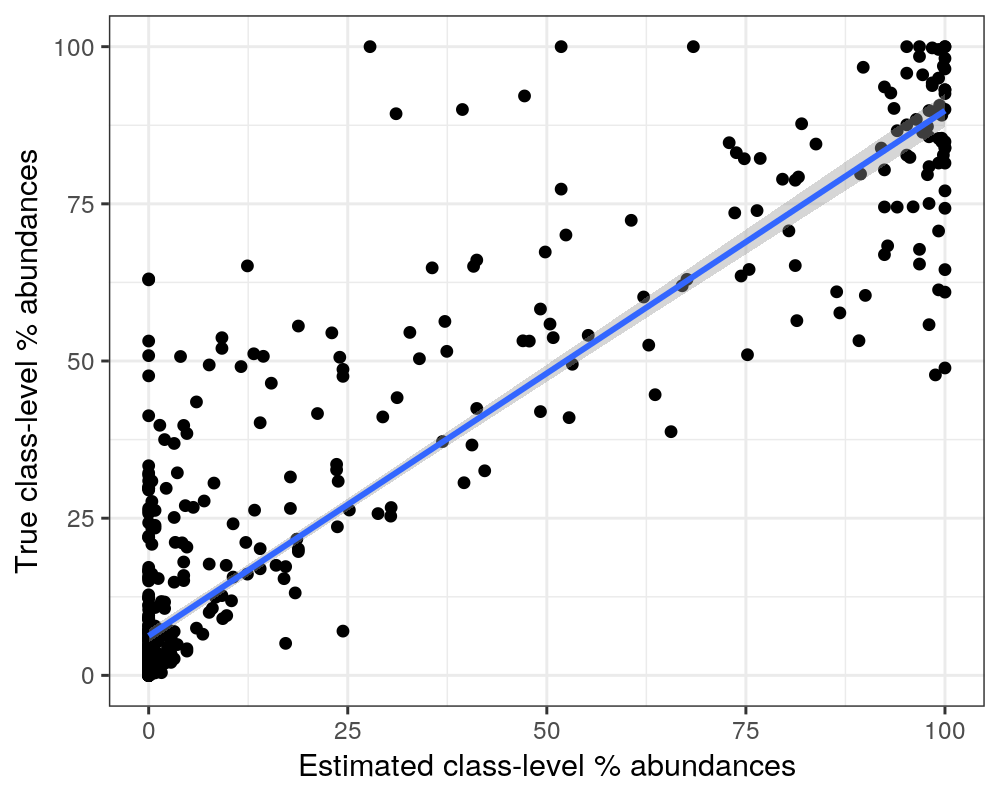

In [183]:
# summary
summary(lm(predict ~ truth, data=asr_tip_acc))

p = asr_tip_acc %>%
    mutate(truth = truth * 100,
           predict = predict * 100) %>%
    ggplot(aes(truth, predict)) + 
    geom_point() +
    geom_smooth(method='lm') +
    labs(x='Estimated class-level % abundances',
         y='True class-level % abundances') +
    theme_bw()

p.dims(5,4)
plot(p)

In [196]:
summary(lm(predict ~ truth + taxon, data=asr_tip_acc))


Call:
lm(formula = predict ~ truth + taxon, data = asr_tip_acc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40626 -0.02832 -0.01658  0.01175  0.78272 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           0.01035    0.01049   0.987    0.324    
truth                                 0.74435    0.02241  33.216  < 2e-16 ***
taxonEuryarchaeota; Halobacteria      0.01791    0.01484   1.207    0.228    
taxonEuryarchaeota; Methanobacteria   0.13839    0.02225   6.219 8.91e-10 ***
taxonEuryarchaeota; Methanomicrobia   0.17348    0.01496  11.592  < 2e-16 ***
taxonEuryarchaeota; Thermoplasmata    0.05936    0.01493   3.977 7.77e-05 ***
taxonThaumarchaeota; Nitrososphaeria  0.01648    0.01493   1.104    0.270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.11 on 653 degrees of freedom
Multiple R-squared:  0.8641,	Adjusted R-squared:  0.8629 
F-statisti

In [195]:
# # summary: per taxon
# lm_per = function(x, df){
#     df = df %>%
#         filter(taxon == x)
#     summary(lm(predict ~ truth, data=df))
# }

# res = asr_tip_acc$taxon %>% unique %>%
#     lapply(lm_per, df=asr_tip_acc)
# names(res) = asr_tip_acc$taxon %>% unique 
# res

`geom_smooth()` using formula 'y ~ x'



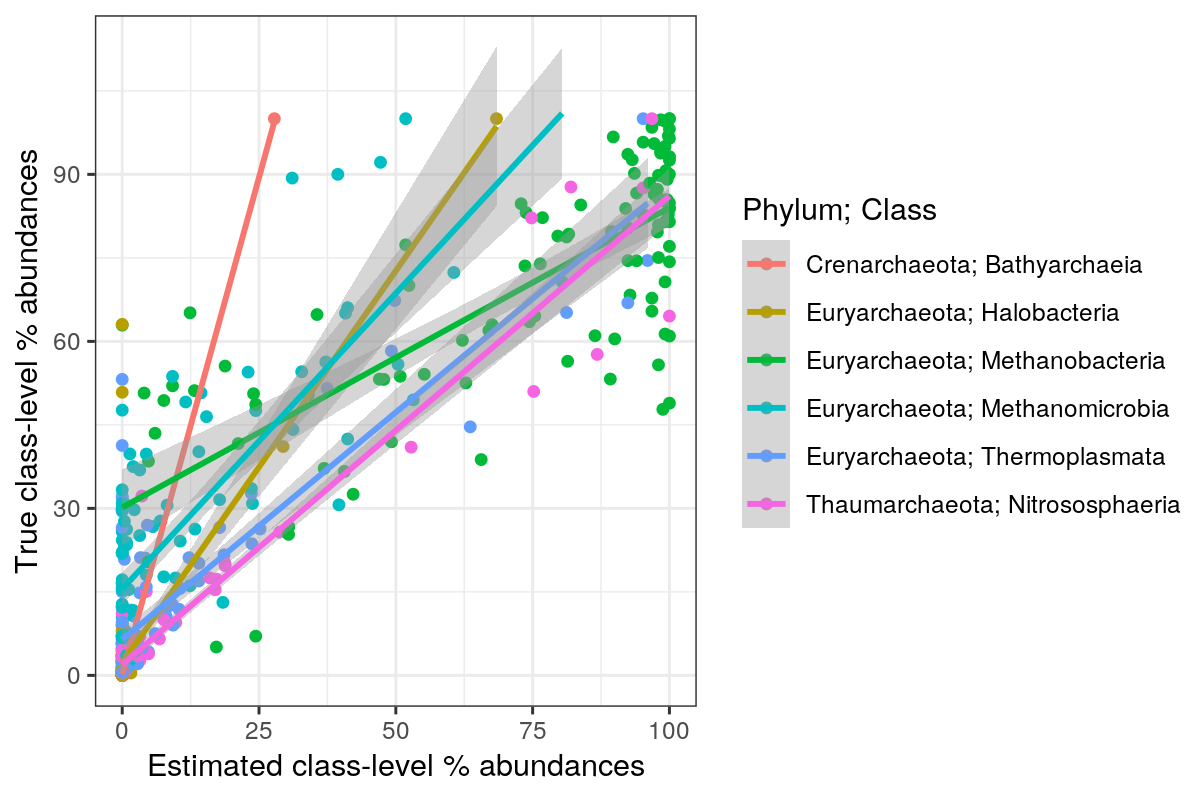

In [186]:
# summary plot
p = asr_tip_acc %>%
    mutate(truth = truth * 100,
           predict = predict * 100) %>%
    ggplot(aes(truth, predict, color=taxon)) + 
    geom_point() +
    geom_smooth(method='lm') +
    scale_color_discrete('Phylum; Class') +
    labs(x='Estimated class-level % abundances',
         y='True class-level % abundances') +
    theme_bw()

p.dims(6,4)
plot(p)

#### CIs

In [189]:
p_BM_CIU %>% colnames

[1] "Crenarchaeota-Bathyarchaeia"    "Euryarchaeota-Halobacteria"    
[3] "Euryarchaeota-Methanobacteria"  "Euryarchaeota-Methanomicrobia" 
[5] "Euryarchaeota-Thermoplasmata"   "Thaumarchaeota-Nitrososphaeria"

In [198]:
# confidence interval summary
to_keep = c('Crenarchaeota-Bathyarchaeia','Euryarchaeota-Methanobacteria',
            'Euryarchaeota-Methanomicrobia', 'Euryarchaeota-Thermoplasmata')
((p_BM_CIU[,to_keep] %>% as.matrix) - (p_BM_CIL[,to_keep] %>% as.matrix)) %>% as.vector %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1.705323,11.83837,26.24888,26.14979,36.81674,85.09515,29.089,11.876


## Plotting

In [136]:
# re-labeling tree internal nodes
n_tips = length(host_tree_SpecD$tip.label)
tree = reorder(host_tree_SpecD, "postorder")
tree$node.label = (1+n_tips):(n_tips + length(host_tree_SpecD$node.label))
tree$node.label

[1] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 [19] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 [37] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 [55] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 [73] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 [91] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[109] 219

### Root node CI

In [137]:
# root node CI
lca = '111'
root_node_asr_CI = rbind(p_BM$anc_recon[lca,], p_BM_CIL[lca,], p_BM_CIU[lca,]) %>% 
    t %>% as.data.frame
colnames(root_node_asr_CI) = c('ASR', 'CIL', 'CIU')
root_node_asr_CI$Taxonomy = rownames(root_node_asr_CI)

df.dims(10)
root_node_asr_CI
df.dims()

,ASR,CIL,CIU,Taxonomy
,<dbl>,<dbl>,<dbl>,<chr>
Crenarchaeota-Bathyarchaeia,3.030409,-0.655771,6.716589,Crenarchaeota-Bathyarchaeia
Euryarchaeota-Halobacteria,1.950474,-16.320504,20.221453,Euryarchaeota-Halobacteria
Euryarchaeota-Methanobacteria,65.910606,26.724358,105.096855,Euryarchaeota-Methanobacteria
Euryarchaeota-Methanomicrobia,9.742735,-11.857507,31.342978,Euryarchaeota-Methanomicrobia
Euryarchaeota-Thermoplasmata,3.504611,-26.354454,33.363676,Euryarchaeota-Thermoplasmata
Thaumarchaeota-Nitrososphaeria,14.831976,-26.017335,55.681286,Thaumarchaeota-Nitrososphaeria


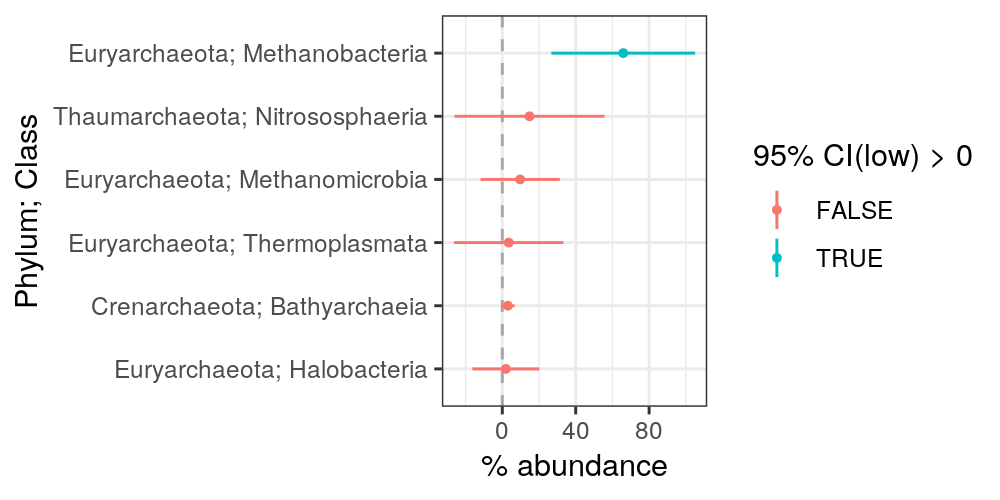

In [138]:
# plotting
p = root_node_asr_CI %>%
    mutate(CIL_gtz = CIL > 0) %>%
    mutate(Taxonomy = gsub('-', '; ', Taxonomy),
           Taxonomy = Taxonomy %>% reorder(ASR)) %>%
    ggplot(aes(x=Taxonomy, y=ASR, ymin=CIL, ymax=CIU, color=CIL_gtz)) +
    geom_hline(yintercept=0, linetype='dashed', alpha=0.3) +
    geom_linerange() +
    geom_point(size=1) +
    scale_color_discrete('95% CI(low) > 0') +
    labs(x='Phylum; Class', y='% abundance') +
    theme_bw() +
    coord_flip()

p.dims(5,2.5)
plot(p)

## Mammal LCA node

In [139]:
mammals = meta %>%
    filter(class == 'Mammalia') %>%
    .$scientific_name %>% unique
mammals %>% length

[1] 71

In [140]:
lca = getMRCA(host_tree_SpecD, mammals) %>% as.character
lca

[1] "150"

In [199]:
# root node CI
root_node_asr_CI = rbind(p_BM$anc_recon[lca,], p_BM_CIL[lca,], p_BM_CIU[lca,]) %>% 
    t %>% as.data.frame
colnames(root_node_asr_CI) = c('ASR', 'CIL', 'CIU')
root_node_asr_CI$Taxonomy = rownames(root_node_asr_CI)
df.dims(6)
root_node_asr_CI
df.dims()

,ASR,CIL,CIU,Taxonomy
,<dbl>,<dbl>,<dbl>,<chr>
Crenarchaeota-Bathyarchaeia,0.6360542,-1.603462,2.875571,Crenarchaeota-Bathyarchaeia
Euryarchaeota-Halobacteria,5.1800341,-6.036034,16.396102,Euryarchaeota-Halobacteria
Euryarchaeota-Methanobacteria,63.5736644,39.322194,87.825135,Euryarchaeota-Methanobacteria
Euryarchaeota-Methanomicrobia,11.3468422,-2.122726,24.816411,Euryarchaeota-Methanomicrobia
Euryarchaeota-Thermoplasmata,11.0465169,-7.118503,29.211537,Euryarchaeota-Thermoplasmata
Thaumarchaeota-Nitrososphaeria,9.8364949,-14.588768,34.261758,Thaumarchaeota-Nitrososphaeria


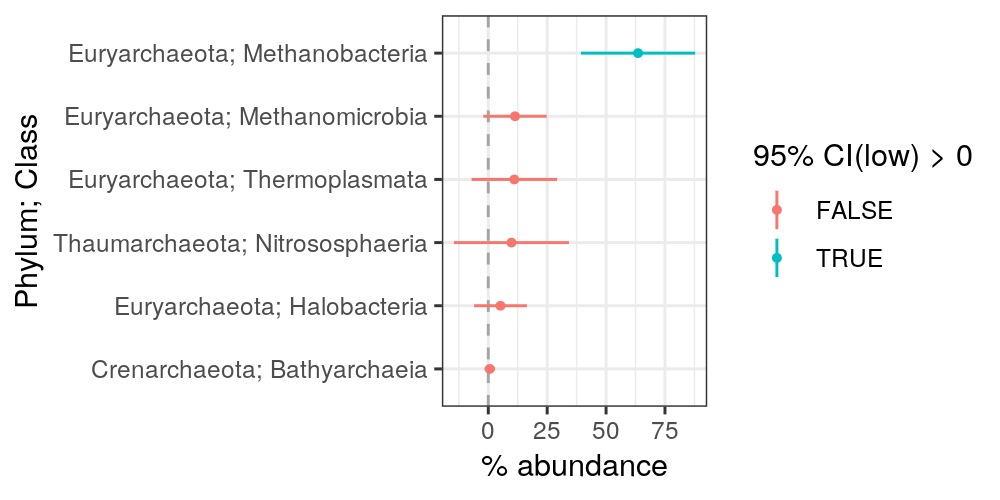

In [142]:
# plotting
p = root_node_asr_CI %>%
    mutate(CIL_gtz = CIL > 0) %>%
    mutate(Taxonomy = gsub('-', '; ', Taxonomy),
           Taxonomy = Taxonomy %>% reorder(ASR)) %>%
    ggplot(aes(x=Taxonomy, y=ASR, ymin=CIL, ymax=CIU, color=CIL_gtz)) +
    geom_hline(yintercept=0, linetype='dashed', alpha=0.3) +
    geom_linerange() +
    geom_point(size=1) +
    scale_color_discrete('95% CI(low) > 0') +
    labs(x='Phylum; Class', y='% abundance') +
    theme_bw() +
    coord_flip()

p.dims(5,2.5)
plot(p)

## Abundances on tree

In [143]:
# #' function to plot traits on the tree
# plot_tree = function(i, tree, taxa, asr){
#     title = taxa[i]
#     # plotting
#     p.dims(6,6.5)
#     par(mar=c(0.1, 0.1, 2, 0.1))

#     ## tree
#     plot(ladderize(tree), type='fan', show.tip.label=TRUE, cex=0.45, 
#          label.offset=6, rotate.tree = 90)
#     title(main=title, cex.main=0.8)
#     ## tips
#     tip_vals = asr[1:length(tree$tip.label),i]
#     tiplabels(pch = 21, cex=(tip_vals))
#     ## nodes
#     node_vals = asr[(1+n_tips):(n_tips + length(host_tree_SpecD$node.label)*1.5)**1.5,i]
#     nodelabels(pch = 21, cex=(node_vals*1.5)**1.5)
# }

In [200]:
#' function to plot traits on the tree
plot_tree = function(i, tree, taxa, asr){
    title = taxa[i]
    # plotting
    p.dims(6,6.5)
    par(mar=c(0.1, 0.1, 2, 0.1))
    mlt = 1.5

    ## tree
    plot(ladderize(tree), type='fan', show.tip.label=TRUE, cex=0.45, 
         label.offset=6, rotate.tree=90)
    title(main=title, cex.main=0.7)
    ## tips
    tip_vals = asr[1:length(tree$tip.label),i]
    #tip_vals = scales::rescale(tip_vals)
    tiplabels(pch = 21, cex=tip_vals * mlt)
    ## nodes
    node_vals = asr[(1+n_tips):(n_tips + length(host_tree_SpecD$node.label)*1.5)**1.5,i]
    #node_vals = scales::rescale(node_vals)
    nodelabels(pch = 21, cex=node_vals * mlt)
}

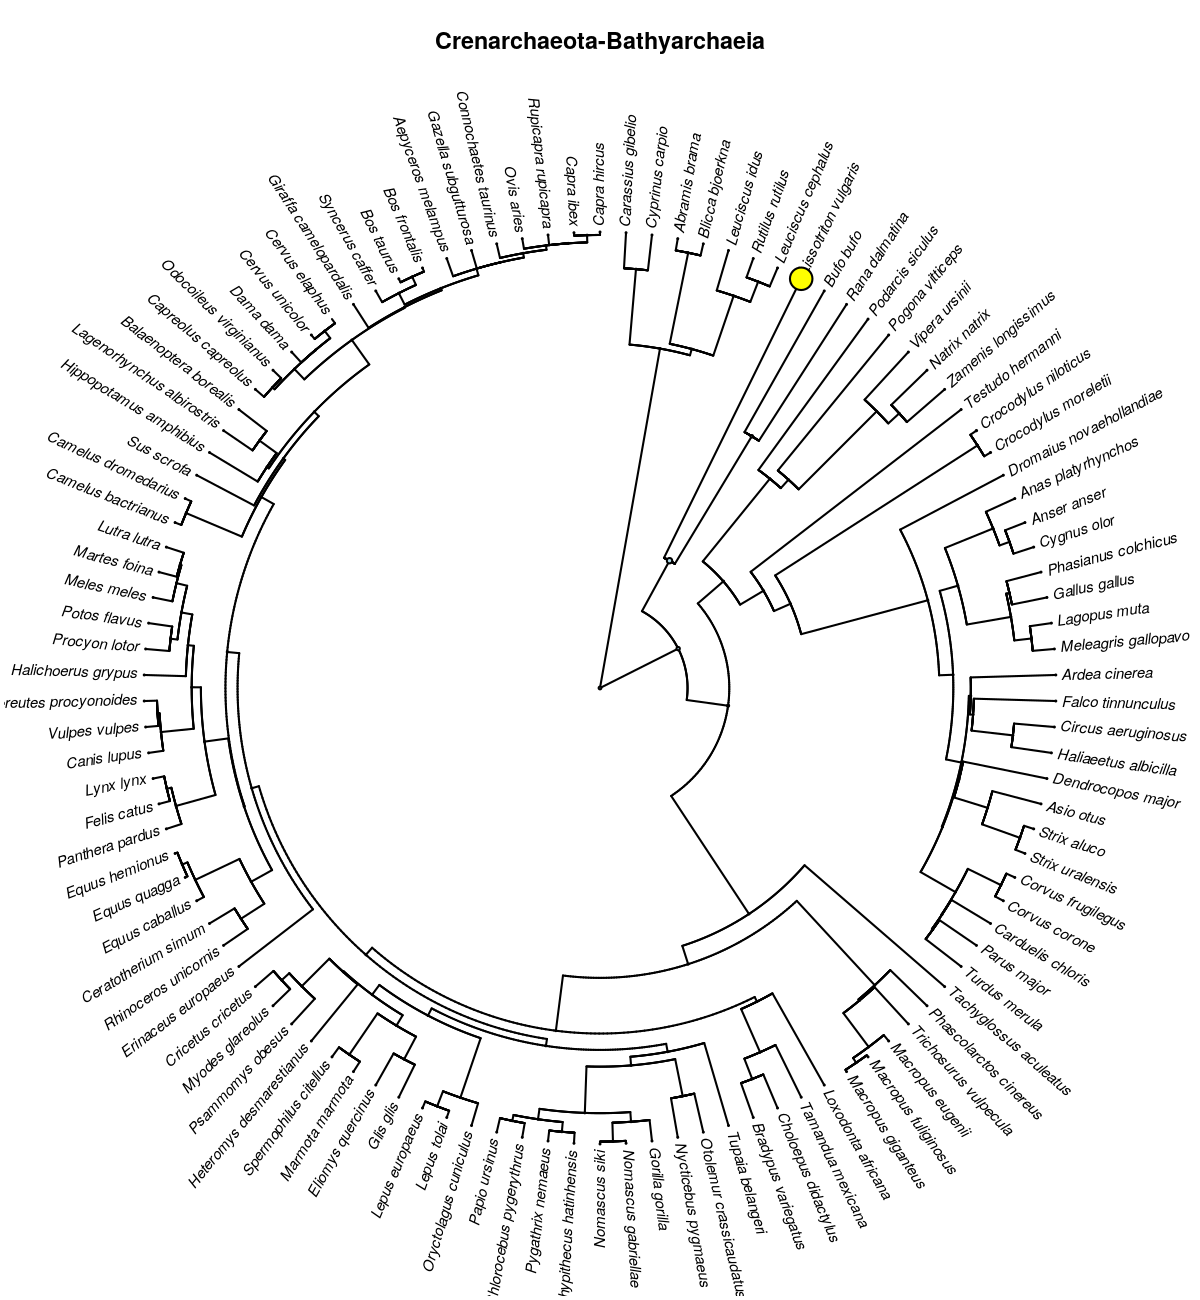

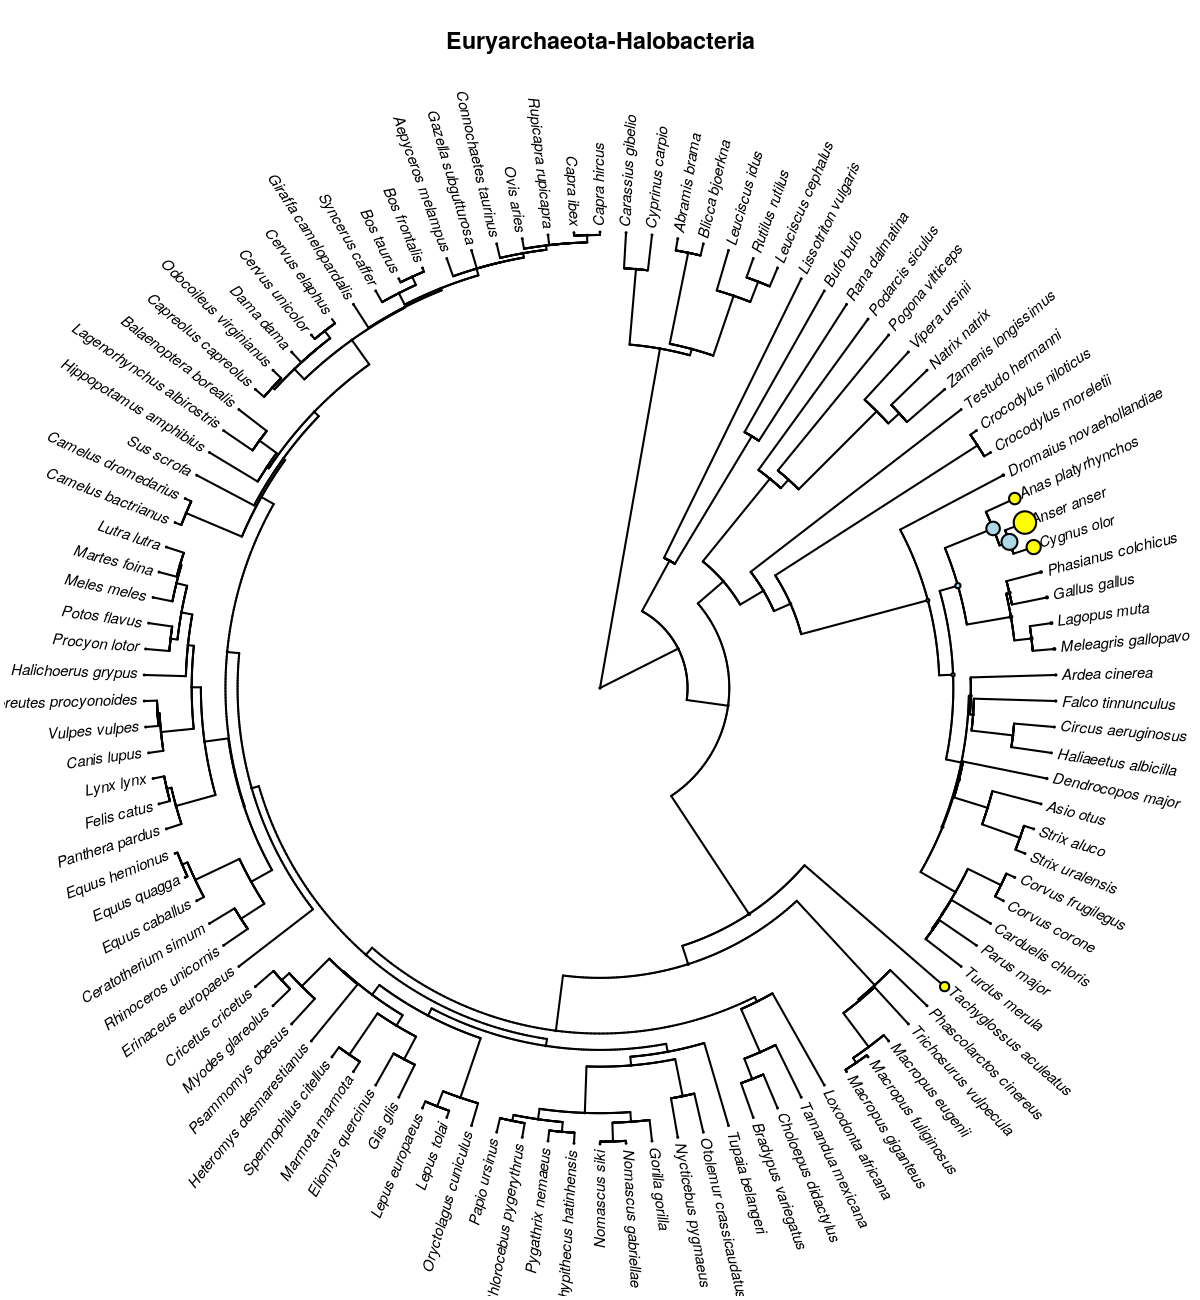

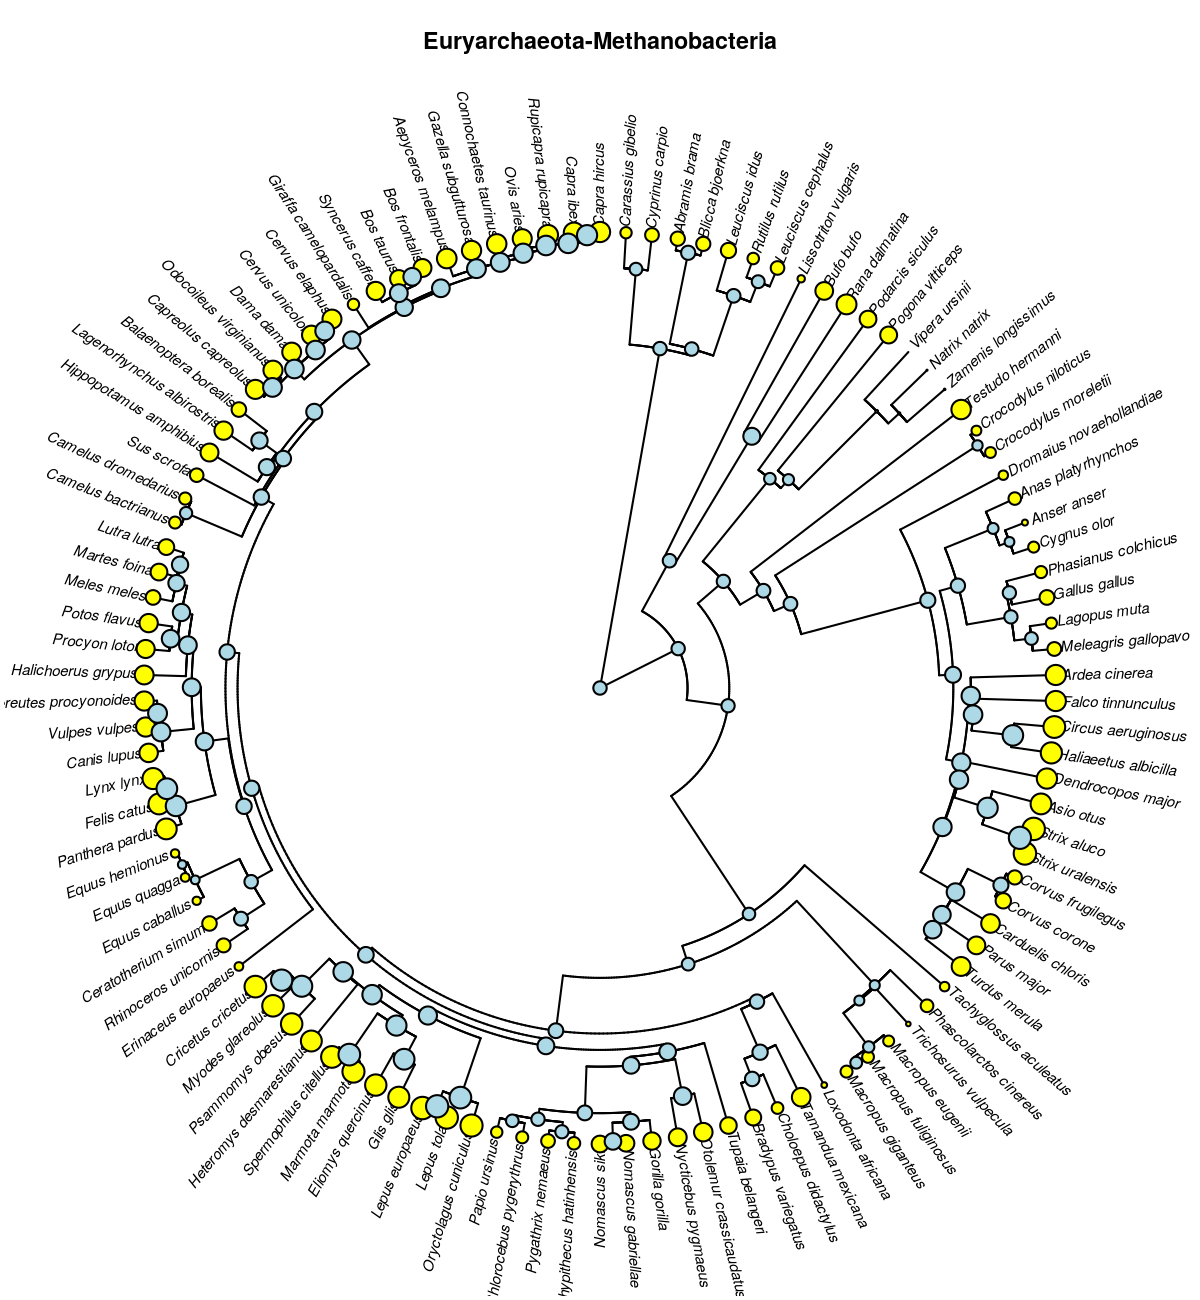

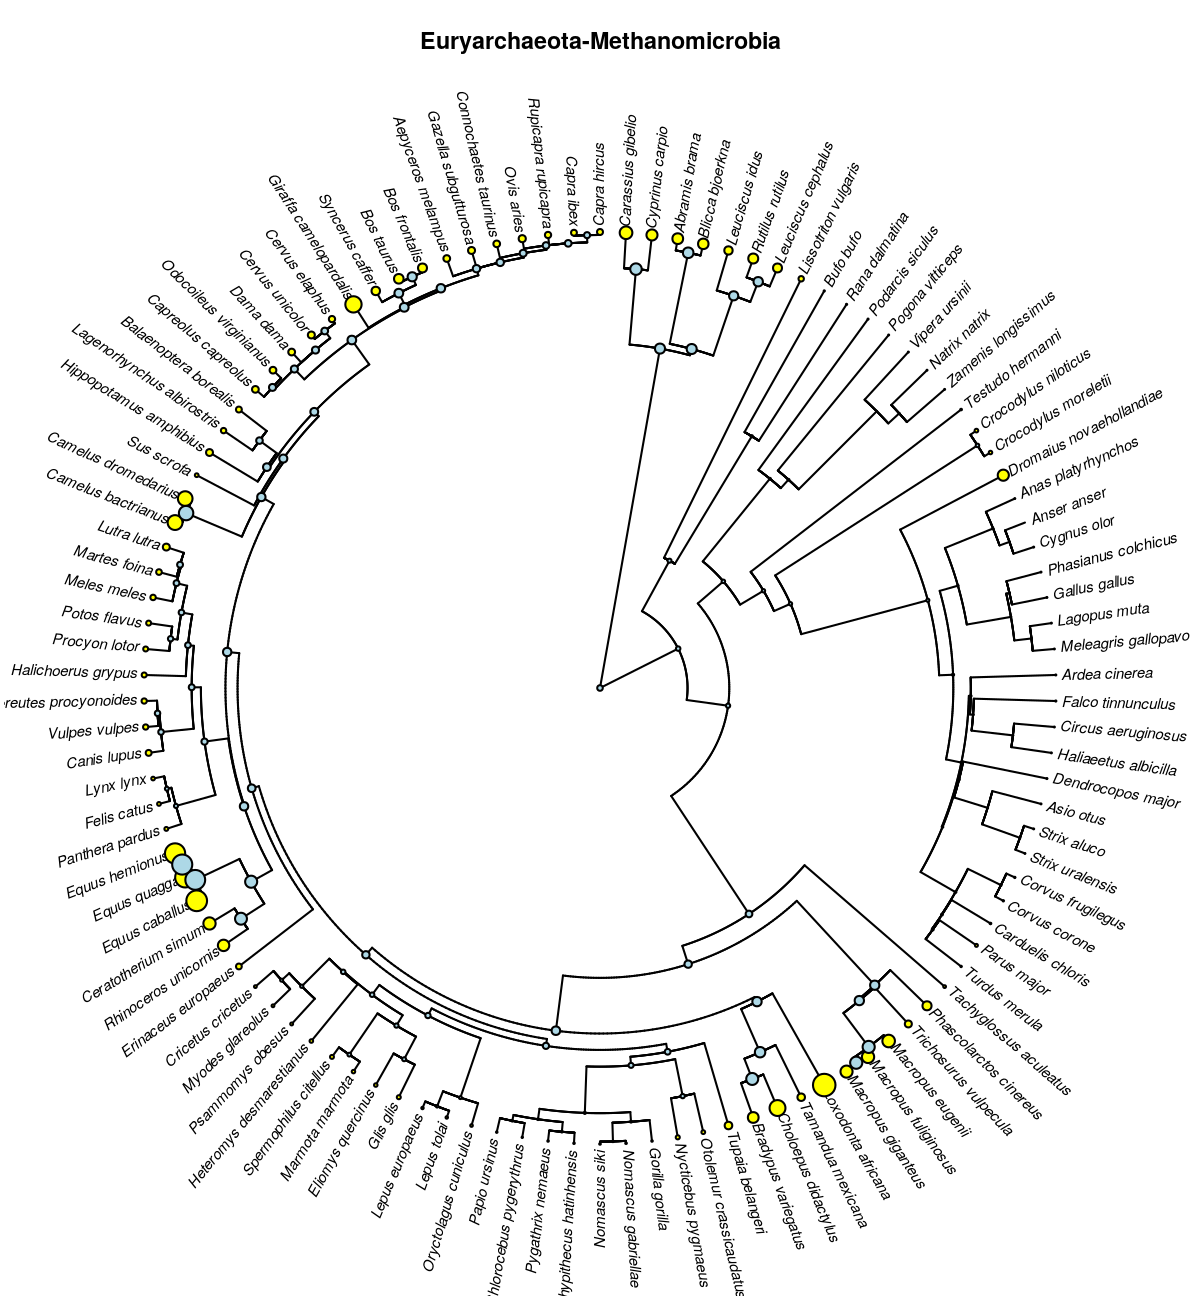

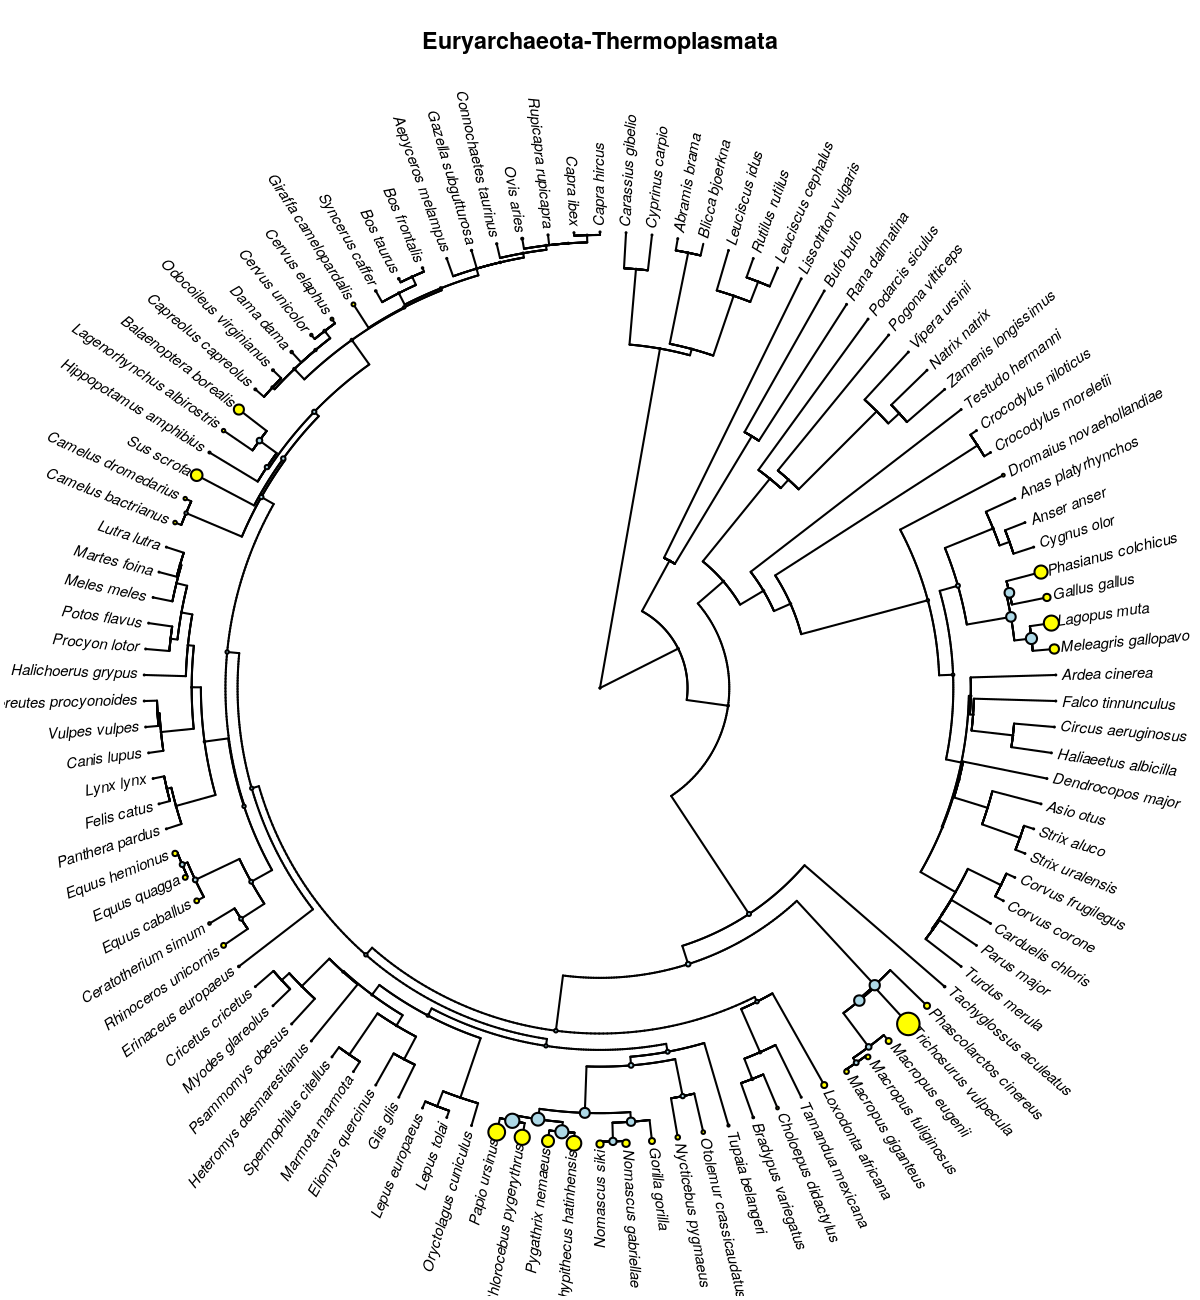

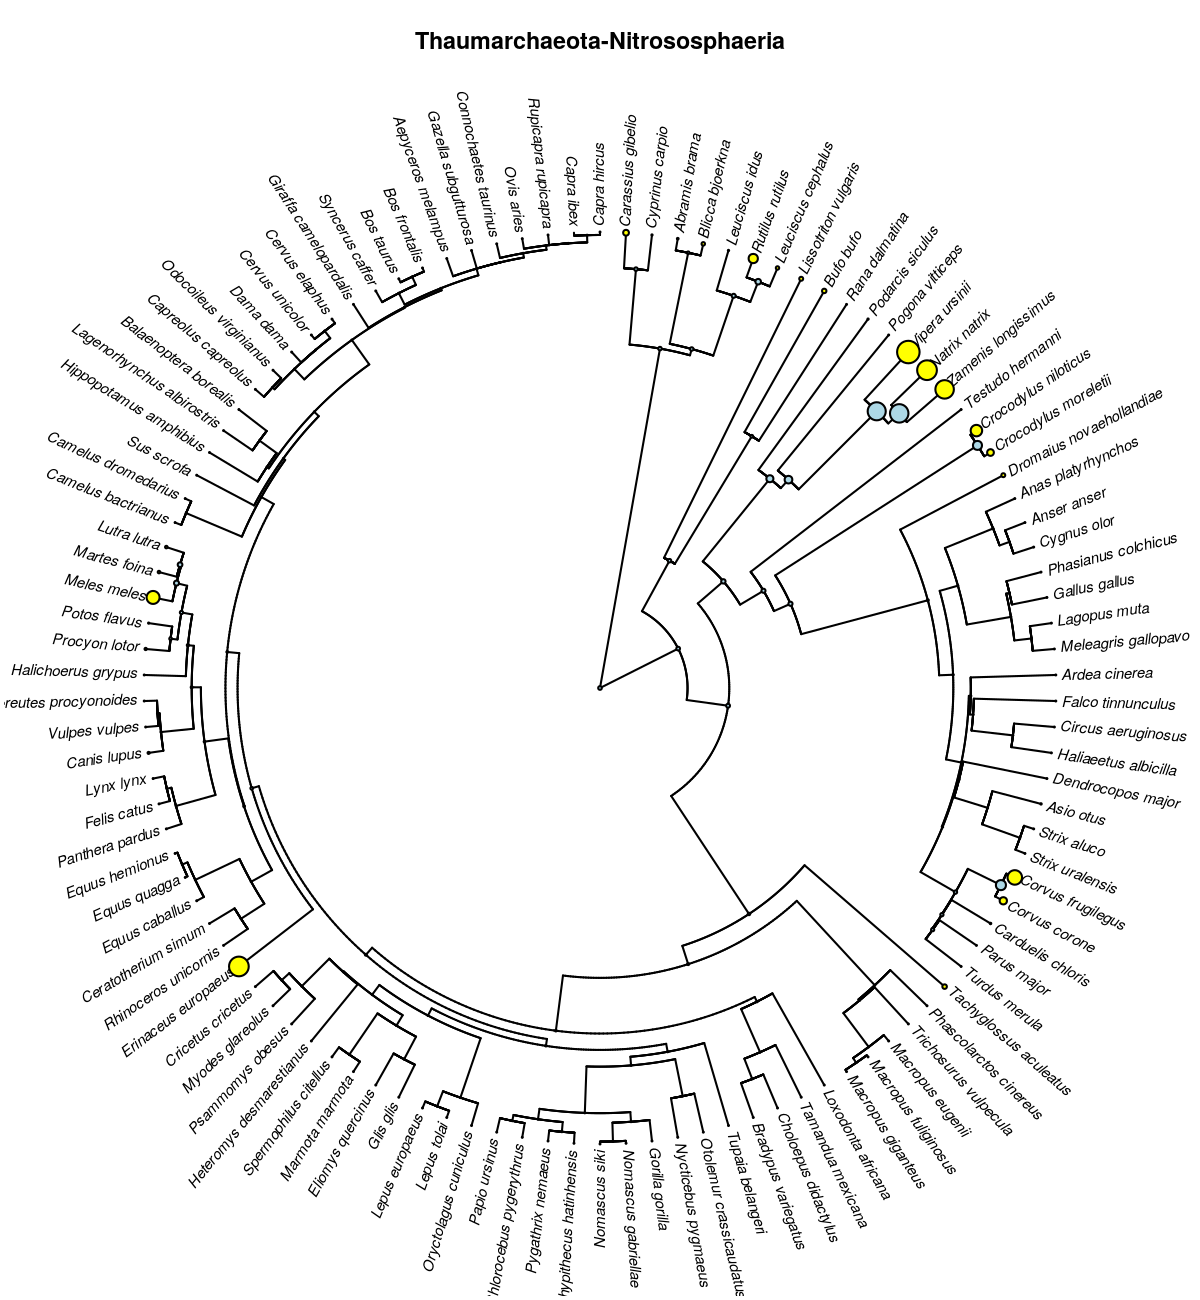

In [201]:
# plotting
taxa = colnames(asr)
ret = 1:length(taxa) %>%
    lapply(plot_tree, tree=tree, taxa=taxa, asr=asr)

# Phylogenetic signal

In [27]:
# Pagel's lambda
p_lambda = phylopars(trait_data = otu,
                     tree = host_tree_SpecD,
                     model = 'lambda')
p_lambda %>% names

[1] "logLik"     "pars"       "model"      "mu"         "npars"     
 [6] "anc_recon"  "anc_var"    "anc_cov"    "tree"       "trait_data"
[11] "REML"

In [28]:
# star phylogeny
p_star = phylopars(trait_data = otu,
                   tree = host_tree_SpecD,
                   model = 'star')
p_star %>% names

[1] "logLik"     "pars"       "model"      "mu"         "npars"     
 [6] "anc_recon"  "anc_var"    "anc_cov"    "tree"       "trait_data"
[11] "REML"

In [29]:
# testing for significance (global phylogenetic signal for all traits)
chi_square = as.double(2*(logLik(p_lambda) - logLik(p_star))) 
degrees_freedom = p_lambda$npars - p_star$npars 
p_val = pchisq(q = chi_square, 
               df = degrees_freedom, 
               lower.tail = FALSE) 
p_val

[1] 1

## Per trait

In [30]:
phy_signal = function(i, trt, tree){
    trt = trt[c(1,i+1)]
    # Pagel's lambda
    p_lambda = phylopars(trait_data = trt,
                         tree = tree,
                         model = 'lambda')
    # star phylogeny
    p_star = phylopars(trait_data = trt,
                       tree = tree,
                       model = 'star')
    # p-value
    chi_square = as.double(2*(logLik(p_lambda) - logLik(p_star))) 
    degrees_freedom = p_lambda$npars - p_star$npars 
    p_val = pchisq(q = chi_square, 
                   df = degrees_freedom, 
                   lower.tail = FALSE) 
    # return
    trt = colnames(trt)[ncol(trt)]
    return(c(trt, p_val))
}

# running in parallel
doParallel::registerDoParallel(threads)
phy_sig = 1:(ncol(otu)-1) %>%
    plyr::llply(phy_signal, trt=otu, tree=host_tree_SpecD, .parallel=TRUE) %>%
    do.call(rbind, .) %>%
    as.data.frame
colnames(phy_sig) = c('Trait', 'p_value')
phy_sig

Trait,p_value
<chr>,<chr>
Crenarchaeota-Bathyarchaeia,1.01298013906107e-22
Euryarchaeota-Halobacteria,0.495678594596448
⋮,⋮
Euryarchaeota-Thermoplasmata,0.198967264499347
Thaumarchaeota-Nitrososphaeria,6.92106506791945e-06


In [31]:
# formatting
phy_sig = phy_sig %>%
    as_tibble %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH'),
           sig = q_value < 0.05) 

df.dims(10)
phy_sig %>% arrange(q_value)
df.dims()

Trait,p_value,q_value,sig
<chr>,<dbl>,<dbl>,<lgl>
Crenarchaeota-Bathyarchaeia,1.012980e-22,6.077881e-22,TRUE
Thaumarchaeota-Nitrososphaeria,6.921065e-06,2.076320e-05,TRUE
Euryarchaeota-Methanomicrobia,9.066364e-02,1.813273e-01,FALSE
Euryarchaeota-Thermoplasmata,1.989673e-01,2.984509e-01,FALSE
Euryarchaeota-Methanobacteria,3.926004e-01,4.711205e-01,FALSE
Euryarchaeota-Halobacteria,4.956786e-01,4.956786e-01,FALSE


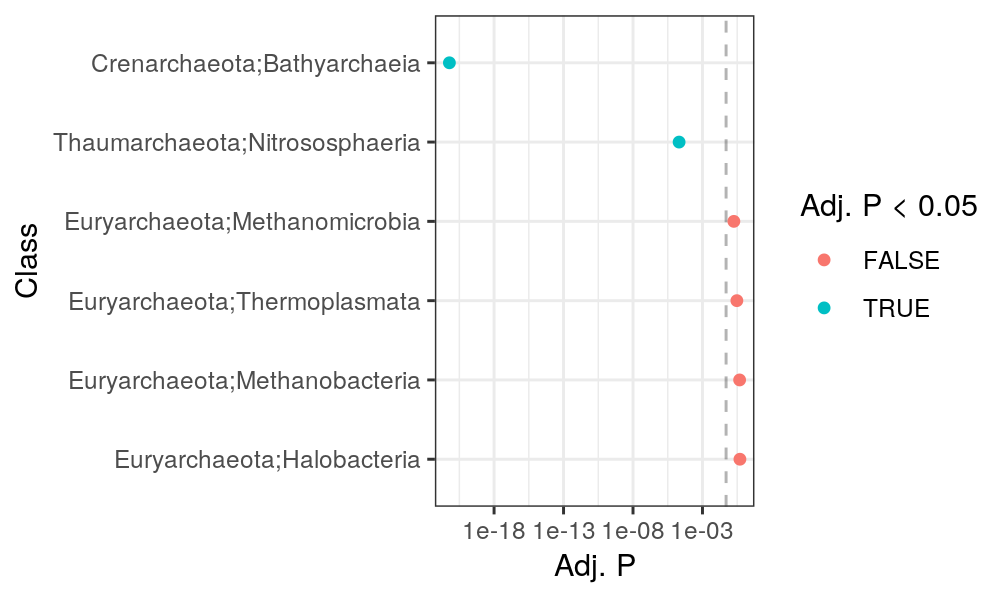

In [32]:
# plotting
p = phy_sig %>%
    mutate(Trait = gsub('-', ';', Trait),
           Trait = Trait %>% reorder(-q_value)) %>%
    ggplot(aes(Trait, q_value, color=sig)) +
    geom_hline(yintercept = 0.05, linetype='dashed', alpha=0.3) +
    geom_point() +
    scale_y_log10() +
    scale_color_discrete('Adj. P < 0.05') +
    labs(x='Class', y='Adj. P') +
    theme_bw() +
    coord_flip()

p.dims(5,3)
plot(p)

# sessionInfo

In [33]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-physig/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] LeyLabRMisc_0.1.6 doParallel_1.0.15 iterators_1.0.12  foreach_1.5.0    
 [5] phyloseq_1.32.0   Rphylopars_0.3.0  phytools_0.7-47   maps_3.3.0       
 [9] ape_5.4           ggplot2_3.3.1     tidyr_1.1.0       dplyr_1.0.0      

loaded via a namespace (and no